# Stack FFI counts across campaigns to find out the most observed pixels

What's the distribution?

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.console import ProgressBar
import logging
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import astropy.visualization
from fast_histogram import histogram1d

In [4]:
df = pd.read_csv('../../k2-target-index/k2-target-pixel-files.csv.gz')

In [5]:
campaigns = df.campaign.unique()

In [6]:
campaigns

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,  91,  92, 101, 102,
       111, 112,  12,  13])

Some of my campaigns failed to count TPFs properly for an as-yet-unknown reason.  Let's skip the campaigns that didn't work for now.  You can spot check which ones worked just by seeing if any pixels were counted.  The "bad" campaigns have zero TPFs matched up.  

In [7]:
! ls ../data/FFI_counts/

C0_FFI_mask.fits   C13_FFI_mask.fits  C3_FFI_mask.fits   C7_FFI_mask.fits
C101_FFI_mask.fits C14_FFI_mask.fits  C4_FFI_mask.fits   C8_FFI_mask.fits
C102_FFI_mask.fits C1_FFI_mask.fits   C5_FFI_mask.fits   C91_FFI_mask.fits
C12_FFI_mask.fits  C2_FFI_mask.fits   C6_FFI_mask.fits   C92_FFI_mask.fits


In [8]:
campaign = 6
hdu_counts = fits.open('../data/FFI_counts/C{}_FFI_mask.fits'.format(str(campaign)))

In [9]:
for i in np.arange(1, 85):
    print(hdu_counts[i].data.sum(), end = ' ')

38872.0 40286.0 37069.0 42849.0 0.0 0.0 0.0 0.0 45759.0 53531.0 41772.0 51449.0 36574.0 39343.0 39133.0 37262.0 0.0 0.0 0.0 0.0 27173.0 25568.0 31748.0 34312.0 40048.0 21922.0 39507.0 53250.0 39829.0 33187.0 51889.0 41816.0 37159.0 36667.0 36466.0 35230.0 31948.0 27152.0 28146.0 34123.0 31699.0 28532.0 20915.0 25642.0 20737.0 21037.0 23443.0 30079.0 25984.0 37125.0 34607.0 36490.0 44491.0 51602.0 39270.0 45483.0 35618.0 25788.0 33885.0 32838.0 33073.0 18821.0 29189.0 32498.0 26796.0 21582.0 34327.0 28559.0 28994.0 35244.0 36642.0 36046.0 38258.0 38184.0 32523.0 36473.0 39013.0 33858.0 34840.0 50081.0 38721.0 33942.0 47862.0 39155.0 

In [10]:
bad_campaigns = [101, 102,13, 14]

good_campaigns = [0,1,2,3,4,5,6,7,8, 91, 92, 12]

In [11]:
len(good_campaigns)

12

In [12]:
mod_outs = [hdu.name for hdu in hdu_counts[1:]]

In [13]:
cols = ['mod_out', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12']

In [14]:
df_all = pd.DataFrame(columns=cols)

In [15]:
hdu_tot_counts = hdu_counts

In [16]:
for campaign in good_campaigns:
    print(campaign, end=' ')
    hdu_counts = fits.open('../data/FFI_counts/C{}_FFI_mask.fits'.format(str(campaign)))
    for mod_out in mod_outs:
        hdu_tot_counts[mod_out].data += (hdu_counts[mod_out].data > 0)

0 1 2 3 4 5 6 7 8 91 92 12 

In [17]:
mod_out

'MOD.OUT 24.4'

In [18]:
i=0

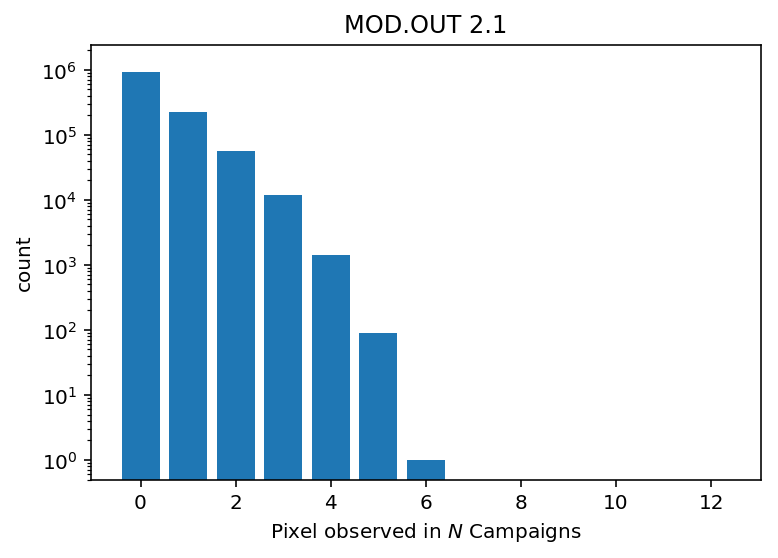

In [19]:
#i+=1
mod_out = mod_outs[i]

y, x = np.histogram(hdu_tot_counts[mod_out].data, bins=np.arange(0,14))

plt.bar(x[:-1], y)
plt.yscale('log')
plt.ylim(0.5, 1211240*2)
plt.title(mod_out)
plt.xlabel('Pixel observed in $N$ Campaigns')
plt.ylabel('count');
#plt.savefig('../figures/mod_out15p4_count_freq.png', dpi=300)

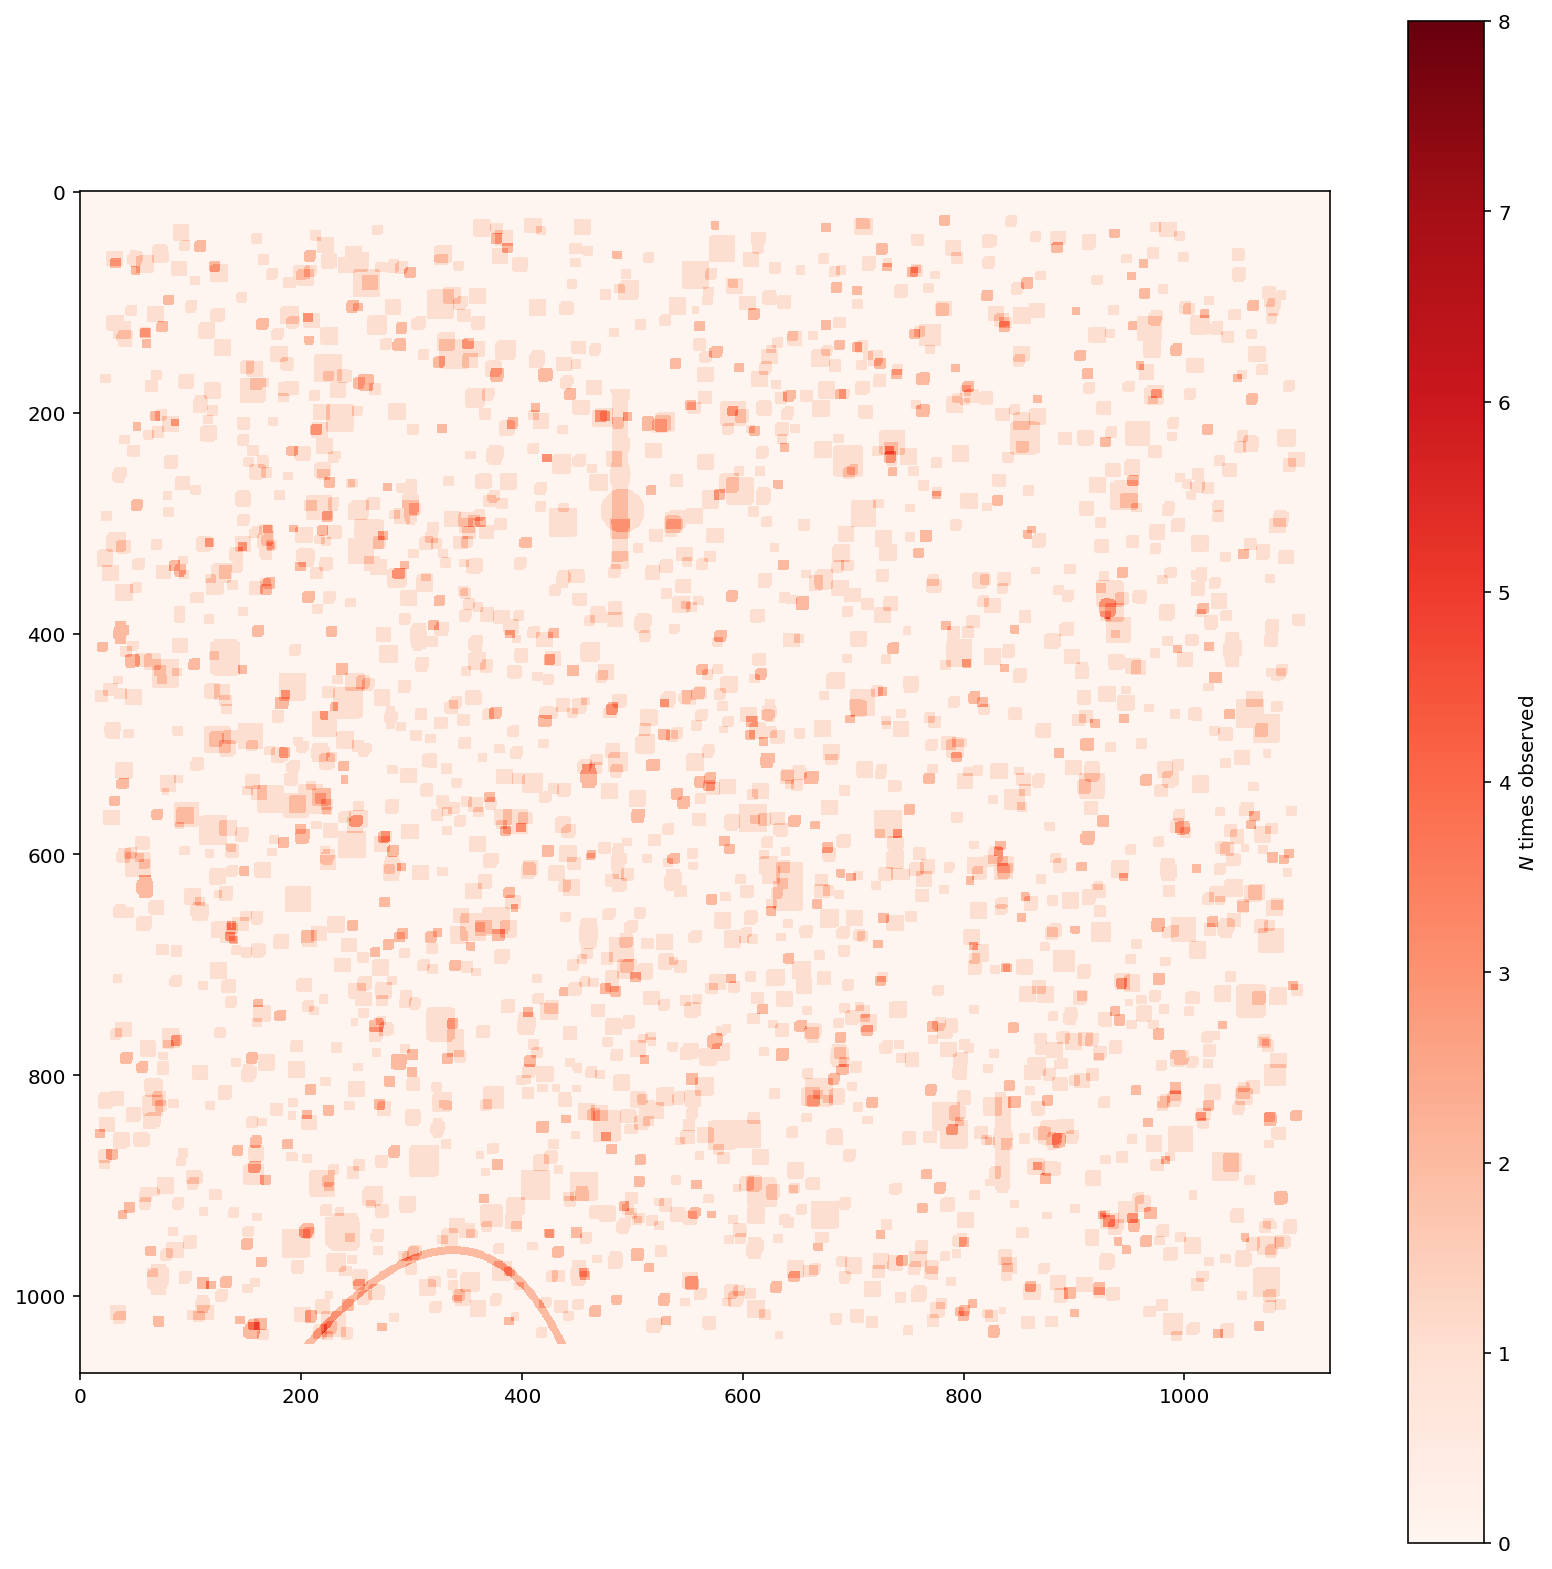

In [20]:
mod_out = mod_outs[i]
plt.figure(figsize=(14,14))
plt.imshow(hdu_tot_counts[mod_out].data, interpolation='none', cmap='Reds', vmax=8);
#plt.imshow(hdu_ffi[mod_out].data, alpha=0.5, interpolation='none', cmap='viridis', norm=norm);
cbar = plt.colorbar()
cbar.set_label('$N$ times observed')
#i+=1
#plt.savefig('../figures/mod_out15p4_FFI_count.png', dpi=300)

Neat!

The end.